In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

In [2]:
data = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'

In [3]:
cars = pd.read_csv(data)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<AxesSubplot: xlabel='wt', ylabel='mpg'>

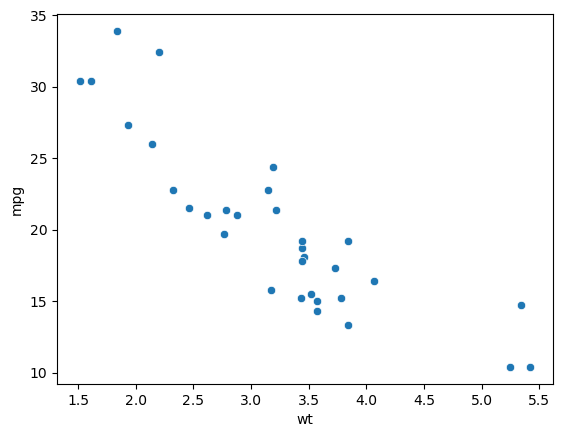

In [4]:
sns.scatterplot(x='wt', y='mpg', data=cars)

<AxesSubplot: xlabel='wt', ylabel='mpg'>

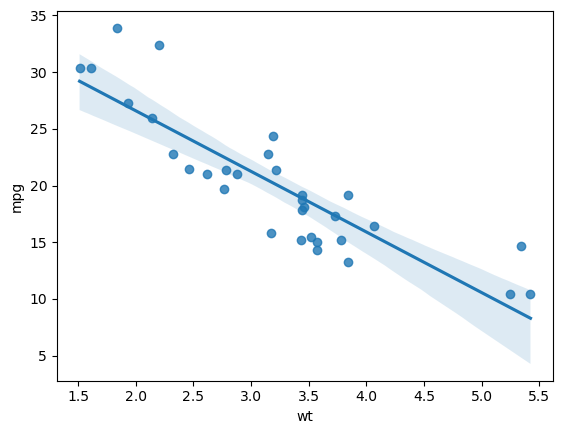

In [5]:
sns.regplot(x='wt', y='mpg', data=cars)

In [6]:
#%% convert data to tensor
X_list = cars.wt.values.tolist()
print(X_list)
X_np = np.array(X_list,dtype=np.float32).reshape(-1,1)
print(X_np)

[2.62, 2.875, 2.32, 3.215, 3.44, 3.46, 3.57, 3.19, 3.15, 3.44, 3.44, 4.07, 3.73, 3.78, 5.25, 5.424, 5.345, 2.2, 1.615, 1.835, 2.465, 3.52, 3.435, 3.84, 3.845, 1.935, 2.14, 1.513, 3.17, 2.77, 3.57, 2.78]
[[2.62 ]
 [2.875]
 [2.32 ]
 [3.215]
 [3.44 ]
 [3.46 ]
 [3.57 ]
 [3.19 ]
 [3.15 ]
 [3.44 ]
 [3.44 ]
 [4.07 ]
 [3.73 ]
 [3.78 ]
 [5.25 ]
 [5.424]
 [5.345]
 [2.2  ]
 [1.615]
 [1.835]
 [2.465]
 [3.52 ]
 [3.435]
 [3.84 ]
 [3.845]
 [1.935]
 [2.14 ]
 [1.513]
 [3.17 ]
 [2.77 ]
 [3.57 ]
 [2.78 ]]


[21.0, 21.0, 22.8, ...] - This is a one-dimensional list.

[[21. ], [21. ], [22.8], ...] - This is a two-dimensional array, essentially a column vector.

In [7]:
y_list = cars.mpg.values.tolist()
print(y_list)
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
print(y_np)

[21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4]
[[21. ]
 [21. ]
 [22.8]
 [21.4]
 [18.7]
 [18.1]
 [14.3]
 [24.4]
 [22.8]
 [19.2]
 [17.8]
 [16.4]
 [17.3]
 [15.2]
 [10.4]
 [10.4]
 [14.7]
 [32.4]
 [30.4]
 [33.9]
 [21.5]
 [15.5]
 [15.2]
 [13.3]
 [19.2]
 [27.3]
 [26. ]
 [30.4]
 [15.8]
 [19.7]
 [15. ]
 [21.4]]


In [8]:
X = torch.from_numpy(X_np)
print(X)

tensor([[2.6200],
        [2.8750],
        [2.3200],
        [3.2150],
        [3.4400],
        [3.4600],
        [3.5700],
        [3.1900],
        [3.1500],
        [3.4400],
        [3.4400],
        [4.0700],
        [3.7300],
        [3.7800],
        [5.2500],
        [5.4240],
        [5.3450],
        [2.2000],
        [1.6150],
        [1.8350],
        [2.4650],
        [3.5200],
        [3.4350],
        [3.8400],
        [3.8450],
        [1.9350],
        [2.1400],
        [1.5130],
        [3.1700],
        [2.7700],
        [3.5700],
        [2.7800]])


In [9]:
y = torch.tensor(y_list)
print(y)

tensor([21.0000, 21.0000, 22.8000, 21.4000, 18.7000, 18.1000, 14.3000, 24.4000,
        22.8000, 19.2000, 17.8000, 16.4000, 17.3000, 15.2000, 10.4000, 10.4000,
        14.7000, 32.4000, 30.4000, 33.9000, 21.5000, 15.5000, 15.2000, 13.3000,
        19.2000, 27.3000, 26.0000, 30.4000, 15.8000, 19.7000, 15.0000, 21.4000])


In [10]:
w = torch.rand(1,requires_grad=True,dtype=torch.float64)
print(w)
b = torch.rand(1,requires_grad=True,dtype=torch.float64)
print(b)

tensor([0.8279], dtype=torch.float64, requires_grad=True)
tensor([0.0763], dtype=torch.float64, requires_grad=True)


In [11]:
num_epochs = 100
learning_rate = 1e-3
for epoch in range(num_epochs):
    for i in range(len(X)):
        #forward pass
        y_pred = X[i]*w + b
        #calculate loss
        loss_tensor = torch.pow(y_pred-y[i],2)
        #backward pass
        loss_tensor.backward()
        #extract losses
        loss_value = loss_tensor.data[0]
        #update weights and biases
        with torch.no_grad(): #used to temporarily disable gradient calculation
            w -= w.grad*learning_rate
            b -= b.grad*learning_rate
            w.grad.zero_() #used to reset the gradients of all the parameters of a model to zero
            b.grad.zero_()
    print(loss_value)

#%% check results
print(f"Weight: {w.item()},Bias: {b.item()}")

tensor(147.4078, dtype=torch.float64)
tensor(78.4680, dtype=torch.float64)
tensor(54.0948, dtype=torch.float64)
tensor(44.3068, dtype=torch.float64)
tensor(39.9636, dtype=torch.float64)
tensor(37.8428, dtype=torch.float64)
tensor(36.6770, dtype=torch.float64)
tensor(35.9334, dtype=torch.float64)
tensor(35.3799, dtype=torch.float64)
tensor(34.9139, dtype=torch.float64)
tensor(34.4893, dtype=torch.float64)
tensor(34.0857, dtype=torch.float64)
tensor(33.6937, dtype=torch.float64)
tensor(33.3091, dtype=torch.float64)
tensor(32.9301, dtype=torch.float64)
tensor(32.5558, dtype=torch.float64)
tensor(32.1858, dtype=torch.float64)
tensor(31.8197, dtype=torch.float64)
tensor(31.4576, dtype=torch.float64)
tensor(31.0994, dtype=torch.float64)
tensor(30.7450, dtype=torch.float64)
tensor(30.3943, dtype=torch.float64)
tensor(30.0473, dtype=torch.float64)
tensor(29.7040, dtype=torch.float64)
tensor(29.3644, dtype=torch.float64)
tensor(29.0283, dtype=torch.float64)
tensor(28.6959, dtype=torch.float64)


In [12]:
y_pred = (torch.tensor(X_list)*w + b).detach().numpy()

<AxesSubplot: >

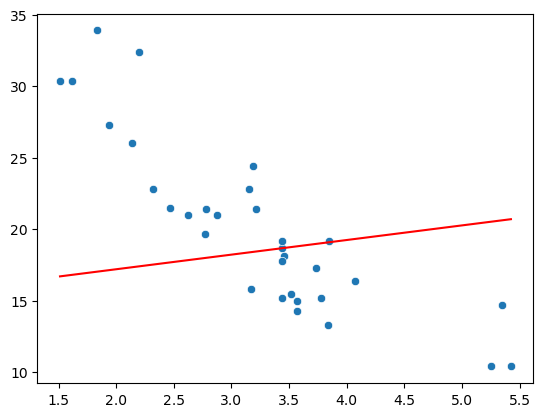

In [13]:
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')

In [14]:
# %% (Statistical) Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_np, y_list)
print(f"Slope: {reg.coef_}, Bias: {reg.intercept_}")

Slope: [-5.3444715], Bias: 37.285125732421875


# Model Class

In [15]:
# convert data to tensor
X_list = cars.wt.values
X_np = np.array(X_list,dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values
y_np = np.array(y_list,dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

In [17]:
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__() #super() function is used to call the constructor of the parent class, which in this case is "nn.Module"
        self.linear = nn.Linear(input_size,output_size)
    def forward(self,x):
        return self.linear(x)

In [18]:
input_dim = 1
output_dim = 1
model = LinearRegression(input_size=input_dim,output_size=output_dim)

In [19]:
loss_fun = nn.MSELoss()

In [20]:
LR = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr=LR)

In [22]:
# perform training
losses, slope, bias = [],[],[]
num_epochs = 1000
for epoch in range(num_epochs):
    # set gradients to zero
    optimizer.zero_grad()
    # forward pass
    y_pred = model(X) # internally calls the forward method of your model. However, it's not just a direct call to forward; it also performs some additional PyTorch-specific behind-the-scenes operations
    # calculate loss
    loss = loss_fun(y_pred,y_true)
    loss.backward()
    # update parameters
    optimizer.step() # responsible for updating the parameters (weights and biases) of the model based on the gradients calculated during the backward pass
    # get parameters
    for name, param in model.named_parameters():#PyTorch function that returns an iterator over all parameters (both weights and biases) in the model, along with their names.
        if param.requires_grad:
            if name == 'linear.weight':
                slope.append(param.data.numpy()[0][0])#weight is a 2D tensor
            if name == 'linear.bias':
                bias.append(param.data.numpy()[0])#bias is a 1D tensor
    # store loss
    losses.append(float(loss.data))
    # print loss
    if (epoch % 100 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")

Epoch 0, Loss: 184.71112060546875
Epoch 100, Loss: 69.14693450927734
Epoch 200, Loss: 41.57597351074219
Epoch 300, Loss: 26.580135345458984
Epoch 400, Loss: 18.423892974853516
Epoch 500, Loss: 13.987700462341309
Epoch 600, Loss: 11.57486343383789
Epoch 700, Loss: 10.262532234191895
Epoch 800, Loss: 9.548748016357422
Epoch 900, Loss: 9.160527229309082


<AxesSubplot: >

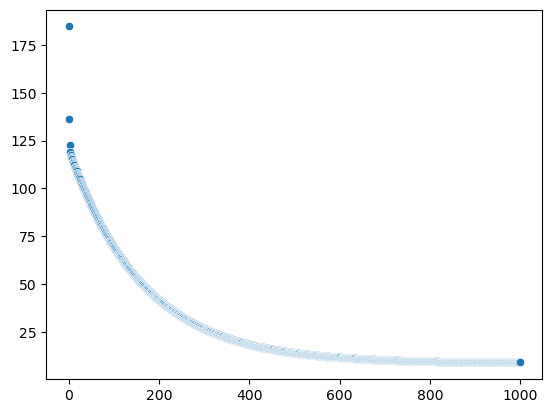

In [24]:
sns.scatterplot(x=range(num_epochs), y=losses)

<AxesSubplot: >

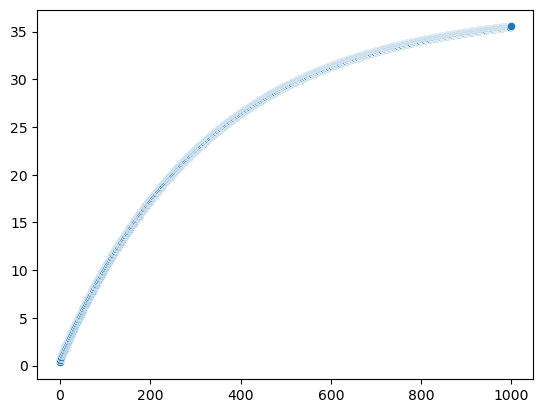

In [25]:
sns.scatterplot(x=range(num_epochs), y=bias)

<AxesSubplot: >

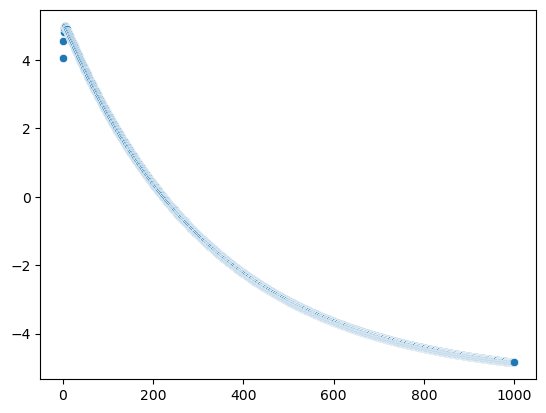

In [26]:
sns.scatterplot(x=range(num_epochs), y=slope)

In [27]:
y_pred = model(X).data.numpy().reshape(-1)

In [28]:
print(y_pred)

[22.849567  21.614845  24.302177  19.968552  18.879091  18.782251
 18.249626  20.089603  20.283283  18.879091  18.879091  15.828606
 17.4749    17.232798  10.114998   9.272484   9.6550045 24.883223
 27.715816  26.650568  23.600082  18.49173   18.903303  16.942276
 16.918066  26.166363  25.173744  28.209705  20.186443  22.12326
 18.249626  22.07484  ]


<AxesSubplot: >

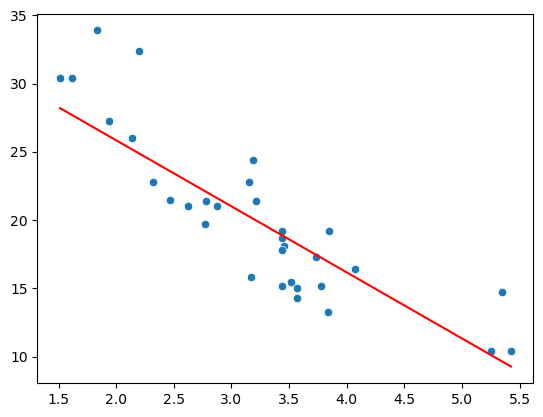

In [29]:
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')